In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
class1 = pd.read_csv("class1.txt")
class2 = pd.read_csv("class2.txt")
print(class1.shape)
print(class2.shape)
class1.head()


(100, 2)
(100, 2)


,weight,height
0,0.132,0.757
1,0.722,0.888
2,0.095,0.804
3,0.633,0.530
4,0.472,0.701


In [10]:
class1.insert(class1.shape[1],'label',1)
class1.head()

,weight,height,label
0,0.132,0.757,1
1,0.722,0.888,1
2,0.095,0.804,1
3,0.633,0.530,1
4,0.472,0.701,1


In [11]:
# add lables to the data. .insert() will directly modify the dataframe
class2.insert(class2.shape[1],'label',-1)
class2.head()


,weight,height,label
0,0.407,0.347,-1
1,0.726,0.761,-1
2,0.644,0.415,-1
3,0.076,0.143,-1
4,0.110,0.010,-1


In [12]:
class12 = class1.append(class2)
print(class12.shape)
class12.head()

(200, 3)


,weight,height,label
0,0.132,0.757,1
1,0.722,0.888,1
2,0.095,0.804,1
3,0.633,0.530,1
4,0.472,0.701,1


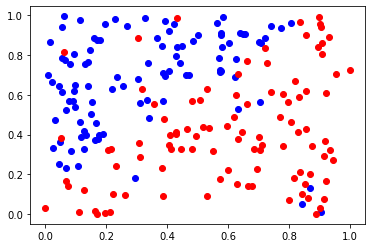

In [13]:

plt.scatter(class1.iloc[:,0],class1.iloc[:,1],color="blue")
plt.scatter(class2.iloc[:,0], class2.iloc[:,1],color="red")





In [14]:
index=0
clean=[]
for i, row in class12.iterrows():
    if(((row['weight']-row['height'])*(-row['label']))>=0.1):
        clean.append(index)
    index=index+1
print(clean)



[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 102, 104, 106, 107, 108, 109, 110, 111, 112, 115, 116, 119, 120, 121, 122, 123, 125, 127, 128, 131, 132, 133, 134, 136, 137, 138, 139, 142, 143, 145, 146, 148, 149, 150, 151, 153, 154, 158, 159, 161, 164, 166, 167, 169, 171, 173, 176, 177, 178, 179, 180, 181, 183, 186, 187, 188, 189, 190, 191, 193, 194]


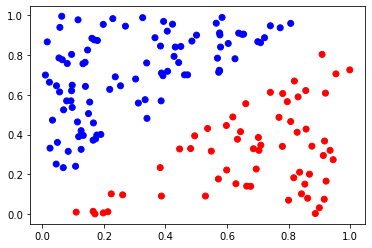

In [15]:
colors=["red", "black","blue"]
i=0
class12_clean=class12.iloc[clean,:]
plt.scatter(class12_clean.iloc[:,0],class12_clean.iloc[:,1],color=[colors[idx+1] for idx in class12_clean.iloc[:,2]])
plt.show();

In [16]:
def perceptron(features, labels, num_iter, learning_rate):
# random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    misclassified_ = []
    for epoch in range(num_iter):
        misclassified = 0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            actual = 1.0 if (v > 0) else -1
            delta = (labels[i] - actual)
            if(delta): # misclassified
                misclassified += 1
                w =w+ (delta*x*learning_rate)
        misclassified_.append(misclassified)
    return (w, misclassified_)


In [17]:
num_iter = 50
eta=0.05
features,labels=class12_clean.iloc[:,0:-1],class12_clean.loc[:,['label']]


In [18]:
# covert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(features, dtype = 'float64')
y_train_m=np.asmatrix(labels, dtype = 'float64')



In [19]:
w, misclassified=perceptron(X_train_m, y_train_m, num_iter, eta)
print(misclassified)

[6, 7, 4, 2, 2, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


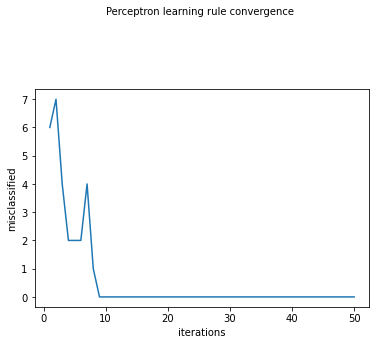

In [20]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.text(10,10,"Perceptron learning rule convergence")
plt.show()


In [21]:
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=w[0,0]/w[0,2]*(-1)
print(slope,intercept)


[[ 0.00797573 -0.24502254  0.22531799]]
1.0874521554827121 -0.03539766505753161


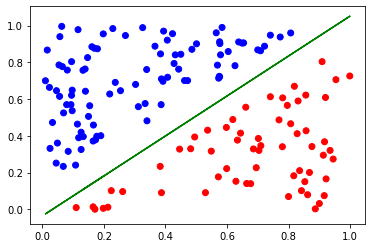

In [22]:
xvalues=class12_clean.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12_clean.iloc[:,0],class12_clean.iloc[:
,1],color=[colors[idx+1] for idx in class12_clean.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")
plt.show()


In [23]:
from sklearn.utils import shuffle 
# partitioning the dataset into training vs. test sets 
# shuffle the data
first_class= shuffle(class1)
second_class= shuffle(class2)
features_first, labels_first= first_class.iloc[:,0:-1], first_class.loc[:,['label']]
features_second, labels_second= second_class.iloc[:,0:-1], second_class.loc[:,['label']]

 #creating trainning step
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_first, labels_first, test_size=.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_second, labels_second, test_size=.2, random_state=42)

#combination step 
X_train=X_train1.append(X_train2)
X_test= X_test1.append(X_test2)
y_train=y_train1.append(y_train2)
y_test= y_test1.append(y_test2)

# covert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(X_train, dtype = 'float64')
X_test_m=np.asmatrix(X_test, dtype = 'float64')
y_train_m=np.asmatrix(y_train, dtype = 'float64')
y_test_m=np.asmatrix(y_test, dtype = 'float64')

In [24]:
def GradientDescentLearning(features, labels, max_iter, learning_rate,
err_threshold, test_features, test_labels):
    w = np.random.rand(features.shape[1]+1)-0.5
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_= []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            diff = learning_rate*(labels[i] - v)
            deltaw=deltaw+diff*x
        #update weights
        #print(deltaw)
        w=w+deltaw
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]
        totalSquaredErr_.append(err)
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        this_err=np.ndarray.item(this_err)
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if((v>=0 and test_labels[i]<0) or (v<0 and test_labels[i]>=0)):
                this_err=this_err+1
        this_err=float(this_err)
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)
        #next epoch
        epoch=epoch+1
    return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)










In [25]:
max_iter = 2000
eta=1.0/X_train.shape[0]
#eta=0.02
print("Learning rate is: %.5f" % eta)
err_threshold=0.1
w, misclassified, testError, accuracy= GradientDescentLearning(X_train_m,
y_train_m, max_iter, eta, err_threshold,X_test_m,y_test_m)
print(misclassified[0:10])
print(testError[0:10])
print(accuracy[0:10])


Learning rate is: 0.00625
[0.5455464771678041, 0.4968239388161676, 0.46350518501472304, 0.4376826552788057, 0.41656264528575804, 0.3989326362527804, 0.3841072972952531, 0.3716079304386487, 0.3610598951110361, 0.3521556186644423]
[0.5545059175369023, 0.5006389522065606, 0.45125460908904474, 0.4167755482051271, 0.385272112217961, 0.35971226870995243, 0.33720029116797473, 0.31814028261190935, 0.301587243118619, 0.28737244290359665]
[0.5, 0.5, 0.725, 0.825, 0.825, 0.825, 0.85, 0.85, 0.875, 0.875]


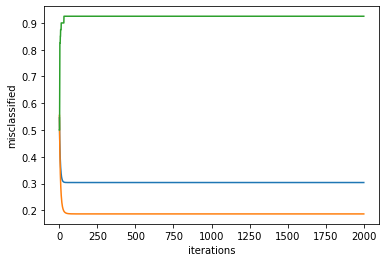

In [26]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.plot(epochs, testError)
plt.plot(epochs, accuracy)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()


In [27]:
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=w[0,0]/w[0,2]*(-1)
print(slope,intercept)


[[-0.01935769 -1.64775206  1.45443688]]
1.1329141111464867 0.013309406105641651


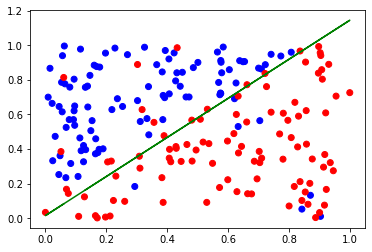

In [28]:
 xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in
class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")
plt.show()


In [29]:
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold):
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    totalSquaredErr_ = []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        # random select an instance
        i=random.randrange(features.shape[0])
        x=features[i,]
        x = np.insert(x,0,1)
        v = np.dot(w, x.transpose())
        diff = learning_rate*(labels[i] - v)
        deltaw=deltaw+diff*x
        #update weights
        #print(deltaw)
        w=w+deltaw
        # now calculate error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
            
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        epoch=epoch+1
    return (w, totalSquaredErr_)






In [30]:
# we use maximum 500 iterations. Because delta rule only uses one instance to update,
# we set learning rate to a small value
max_iter = 2000
eta=0.01
err_threshold=0.1
w, misclassified= Delta(X_train_m, y_train_m, max_iter, eta, err_threshold)
print(misclassified[0:10])

<ipython-input-29-49a2ece382ac>:28: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  this_err=np.asscalar(this_err)


[88.33763893121738, 88.79420089237104, 89.3501908543682, 89.90400027193387, 90.46092705916948, 91.0813098219758, 91.70300821672674, 90.48943887421115, 90.95833842200906, 89.93569635936336]


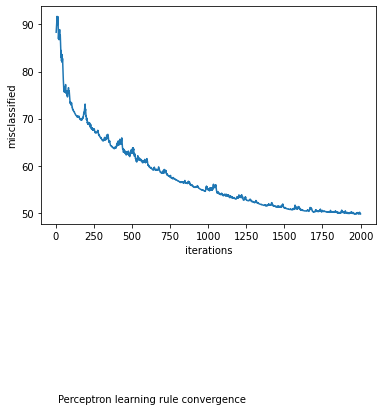

In [31]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.text(10,10,"Perceptron learning rule convergence")
plt.show()


In [32]:
# Now we create a plot to show learned decision boundaries (find slope and intercept)
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=w[0,0]/w[0,2]*(-1)
print(slope,intercept)


[[ 0.08158683 -1.45302569  1.07410671]]
1.3527759253445928 -0.07595784537693419


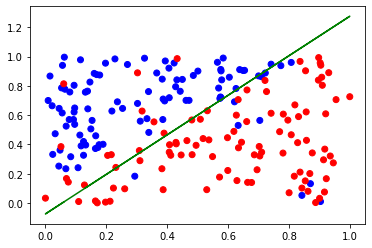

In [33]:
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")
plt.show()